In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers, optimizers
from sklearn.model_selection import train_test_split
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import os


print(tf.__version__)

2.3.0


# 데이터셋 만들기

In [110]:
image_datas = glob('Train/*/*.jpg')
forders = os.listdir('Train')
class_name = [forder for forder in forders if not '.' in forder]
dic = {"Normal" : 0,
       "Hollenhorst_Emboli" : 1,
      "Branch_Retinal_Artery_Occlusion" : 2,
      "Cilio-Retinal_Artery_Occlusion" : 3,
      "Branch_Retinal_Vein_Occlusion" : 4,
      "Central_Retinal_Vein_Occlusion" : 5,
      "Hemi-Central_Retinal_Vein_Occlusion" : 6,
      "Background_Diabetic_Retinopathy" : 7,
      "Proliferative_Diabetic_Retinopathy":8,
      "Arteriosclerotic_Retinopathy":9,
      "Hypertensive_Retinopathy":10,
      "Coats":11,
      "Macroaneurism" :12,
      "Choroidal_Neovascularization":13,
      "diabetic_retinopathy":15,
      "glaucomatous":16,
      "cataract":17,
      "retina_disease":18,
      "Diabetic_Macular_Edema":14}

In [111]:
class_name

['Arteriosclerotic_Retinopathy',
 'Background_Diabetic_Retinopathy',
 'Branch_Retinal_Artery_Occlusion',
 'Branch_Retinal_Vein_Occlusion',
 'cataract',
 'Central_Retinal_Vein_Occlusion',
 'Choroidal_Neovascularization',
 'Cilio-Retinal_Artery_Occlusion',
 'Coats',
 'Diabetic_Macular_Edema',
 'diabetic_retinopathy',
 'glaucomatous',
 'Hemi-Central_Retinal_Vein_Occlusion',
 'Hollenhorst_Emboli',
 'Hypertensive_Retinopathy',
 'Macroaneurism',
 'Normal',
 'Proliferative_Diabetic_Retinopathy',
 'retina_disease']

In [103]:
from collections import defaultdict

In [158]:
def invert_dictionary(obj):
    inv_obj = defaultdict(list)
    for key, value in obj.items():
        inv_obj[value].append(key)
    return dict(inv_obj)
new_dic = invert_dictionary(dic)

TypeError: 'collections.defaultdict' object is not callable

In [174]:

for i in range(19):
    new_dic[i] = ''.join(new_dic[i])
new_dic

{0: 'Normal',
 1: 'Hollenhorst_Emboli',
 2: 'Branch_Retinal_Artery_Occlusion',
 3: 'Cilio-Retinal_Artery_Occlusion',
 4: 'Branch_Retinal_Vein_Occlusion',
 5: 'Central_Retinal_Vein_Occlusion',
 6: 'Hemi-Central_Retinal_Vein_Occlusion',
 7: 'Background_Diabetic_Retinopathy',
 8: 'Proliferative_Diabetic_Retinopathy',
 9: 'Arteriosclerotic_Retinopathy',
 10: 'Hypertensive_Retinopathy',
 11: 'Coats',
 12: 'Macroaneurism',
 13: 'Choroidal_Neovascularization',
 15: 'diabetic_retinopathy',
 16: 'glaucomatous',
 17: 'cataract',
 18: 'retina_disease',
 14: 'Diabetic_Macular_Edema'}

In [116]:
name = []
for i in range(19):
    name.append(new_dic[i][0])

In [117]:
name

['Normal',
 'Hollenhorst_Emboli',
 'Branch_Retinal_Artery_Occlusion',
 'Cilio-Retinal_Artery_Occlusion',
 'Branch_Retinal_Vein_Occlusion',
 'Central_Retinal_Vein_Occlusion',
 'Hemi-Central_Retinal_Vein_Occlusion',
 'Background_Diabetic_Retinopathy',
 'Proliferative_Diabetic_Retinopathy',
 'Arteriosclerotic_Retinopathy',
 'Hypertensive_Retinopathy',
 'Coats',
 'Macroaneurism',
 'Choroidal_Neovascularization',
 'Diabetic_Macular_Edema',
 'diabetic_retinopathy',
 'glaucomatous',
 'cataract',
 'retina_disease']

In [118]:
class_name = name

In [4]:
image_datas

['Train\\Arteriosclerotic_Retinopathy\\data103.jpg',
 'Train\\Arteriosclerotic_Retinopathy\\data105.jpg',
 'Train\\Arteriosclerotic_Retinopathy\\data11.jpg',
 'Train\\Arteriosclerotic_Retinopathy\\data134.jpg',
 'Train\\Arteriosclerotic_Retinopathy\\data136.jpg',
 'Train\\Arteriosclerotic_Retinopathy\\data141.jpg',
 'Train\\Arteriosclerotic_Retinopathy\\data170.jpg',
 'Train\\Arteriosclerotic_Retinopathy\\data182.jpg',
 'Train\\Arteriosclerotic_Retinopathy\\data184.jpg',
 'Train\\Arteriosclerotic_Retinopathy\\data205.jpg',
 'Train\\Arteriosclerotic_Retinopathy\\data22.jpg',
 'Train\\Arteriosclerotic_Retinopathy\\data236.jpg',
 'Train\\Arteriosclerotic_Retinopathy\\data237.jpg',
 'Train\\Arteriosclerotic_Retinopathy\\data24.jpg',
 'Train\\Arteriosclerotic_Retinopathy\\data254.jpg',
 'Train\\Arteriosclerotic_Retinopathy\\data256.jpg',
 'Train\\Arteriosclerotic_Retinopathy\\data257.jpg',
 'Train\\Arteriosclerotic_Retinopathy\\data28.jpg',
 'Train\\Arteriosclerotic_Retinopathy\\data296.jpg

In [5]:
X = []
Y = []
for imagename in image_datas:
    image = Image.open(imagename)
    image = image.resize((128,128))
    image = np.array(image)
    X.append(image)
    label = imagename.split('\\')[1]
    label = dic[label]
    Y.append(label)

In [6]:
X = np.array(X)
Y = np.array(Y)

# 데이터셋 분리

In [7]:
train_images, test_images, train_labels, test_labels = train_test_split(X,Y, test_size = 0.2, shuffle=True, random_state=33)
N_TRAIN = train_images.shape[0]
N_TEST = test_images.shape[0]
train_labels = train_labels[..., tf.newaxis]
test_labels = test_labels [..., tf.newaxis]
# tf.newaxis : 새로운 차원을 추가하여, 다른 모양의 배열간 브로드 캐스팅을 가능하게 함

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((2903, 128, 128, 3), (2903, 1), (726, 128, 128, 3), (726, 1))

In [8]:
## train set의 각 class별 image 수 확인
unique, counts = np.unique(np.reshape(train_labels, (2903)), axis =-1, return_counts=True)
dict(zip(unique, counts))

{0: 1343,
 1: 10,
 2: 6,
 3: 6,
 4: 9,
 5: 22,
 6: 11,
 7: 54,
 8: 18,
 9: 28,
 10: 28,
 11: 8,
 12: 5,
 13: 49,
 14: 109,
 15: 612,
 16: 416,
 17: 81,
 18: 88}

In [9]:
## test set의 각 class별 image수 확인
unique, counts = np.unique(np.reshape(test_labels, (726)), axis =-1, return_counts=True)
dict(zip(unique, counts))

{0: 359,
 1: 3,
 2: 1,
 3: 3,
 4: 2,
 5: 3,
 6: 1,
 7: 16,
 8: 5,
 9: 5,
 10: 8,
 11: 6,
 12: 3,
 13: 12,
 14: 42,
 15: 130,
 16: 96,
 17: 19,
 18: 12}

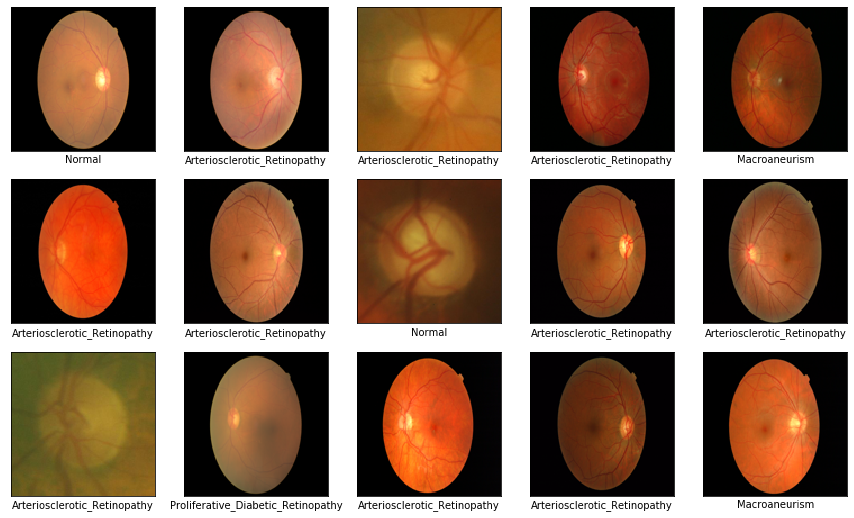

In [10]:
## Data확인
plt.figure(figsize = (15,9))
for i in range(15):
    img_idx = np.random.randint(0, N_TRAIN)
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[img_idx])
    plt.xlabel(class_name[train_labels[img_idx][0]])

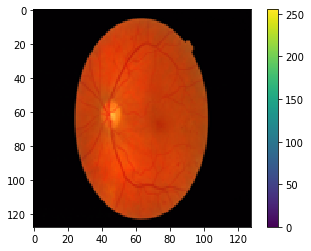

In [11]:
# 모델 훈련 전, 정확한 모델링을 위한 데이터셋 전처리
plt.figure()
plt.imshow(train_images[400])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
## pixel값을 0~1 범위로 조정
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

# label을 onehot-encoding
train_labels = keras.utils.to_categorical(train_labels, 19)
test_labels = keras.utils.to_categorical(test_labels, 19)

In [13]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(2903, 128, 128, 3) (2903, 19)
(726, 128, 128, 3) (726, 19)


In [14]:
## Hyper parameters

IMG_CHANNERS = 3
IMG_ROWS = 128
IMG_COLS = 128

learning_rate = 0.01
EPOCHS = 10
BATCH_SIZE = 50
CLASS = 19
steps_per_epoch = N_TRAIN//BATCH_SIZE
validation_steps = N_TEST//BATCH_SIZE
OPTIM = tf.keras.optimizers.RMSprop()

In [15]:
## dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
buffer_size = 2903).batch(BATCH_SIZE).repeat()

In [16]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(BATCH_SIZE)

#  모델 구성


In [17]:
# CONVNET 정의
def build(input_shape, classes):
    model = models.Sequential()
    model.add(keras.layers.Conv2D(filters = 32, kernel_size = 3,
                                 activation = 'relu', padding = 'same',
                                 input_shape = input_shape))
    model.add(keras.layers.MaxPool2D(padding = 'same'))
    model.add(keras.layers.Conv2D(filters = 64, kernel_size = 3,
                                 activation = 'relu', padding = 'same'))
    model.add(keras.layers.MaxPool2D(padding='same'))
    model.add(keras.layers.Conv2D(filters = 128, kernel_size = 3,
                                 activation = 'relu', padding = 'same'))
    model.add(keras.layers.MaxPool2D(padding='same'))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(classes, activation='softmax'))
    return model

In [2]:
## 모델 생성. compile and summary
model = build((IMG_ROWS, IMG_COLS, IMG_CHANNERS), CLASS)
model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(learning_rate), metrics=['accuracy'])
model.summary()

NameError: name 'build' is not defined

In [19]:
## parameters for training
steps_per_epoch = N_TRAIN//BATCH_SIZE
validation_steps = N_TEST//BATCH_SIZE
print(steps_per_epoch, validation_steps)

58 14


In [20]:
# 텐서보드 사용
callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='./logs_Simple')
]

In [1]:
## Training

history = model.fit(train_dataset, epochs=EPOCHS, steps_per_epoch = steps_per_epoch, validation_data = test_dataset, validation_steps = validation_steps, callbacks = callbacks)

NameError: name 'model' is not defined

In [22]:
socre = model.evaluate(test_dataset)
print('\nTest Score : ',socre[0])
print('Test Accuracy : ',socre[1])

15/15 [==============================] - 3s 179ms/step - loss: 1.0495 - accuracy: 0.5868

Test Score :  1.0494951009750366
Test Accuracy :  0.586776852607727


In [23]:
test_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
from sklearn.metrics import classification_report
import numpy as np
Y_test = np.argmax(test_labels, axis=1)
y_pred = model.predict_classes(test_dataset)
result = classification_report(Y_test, y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


C:\Users\YeoJunChoi\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print(result)

              precision    recall  f1-score   support

           0       0.68      0.75      0.71       359
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.20      0.62      0.31        16
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5
          10       0.25      0.12      0.17         8
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00        42
          15       0.43      0.62      0.50       130
          16       0.95      0.61      0.75        96
          17       0.33    

In [132]:
## 결과 확인
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                        100*np.max(predictions_array),
                                        class_name[true_label]),
                                        color = color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(CLASS), class_name, rotation=90)
    plt.yticks([])
    
    thisplot = plt.bar(range(CLASS), predictions_array, color='#777777')
    plt.ylim([0,1])

    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


In [133]:
def abc(i, array):
    a = array[i]
    df = pd.DataFrame(a)
    return df

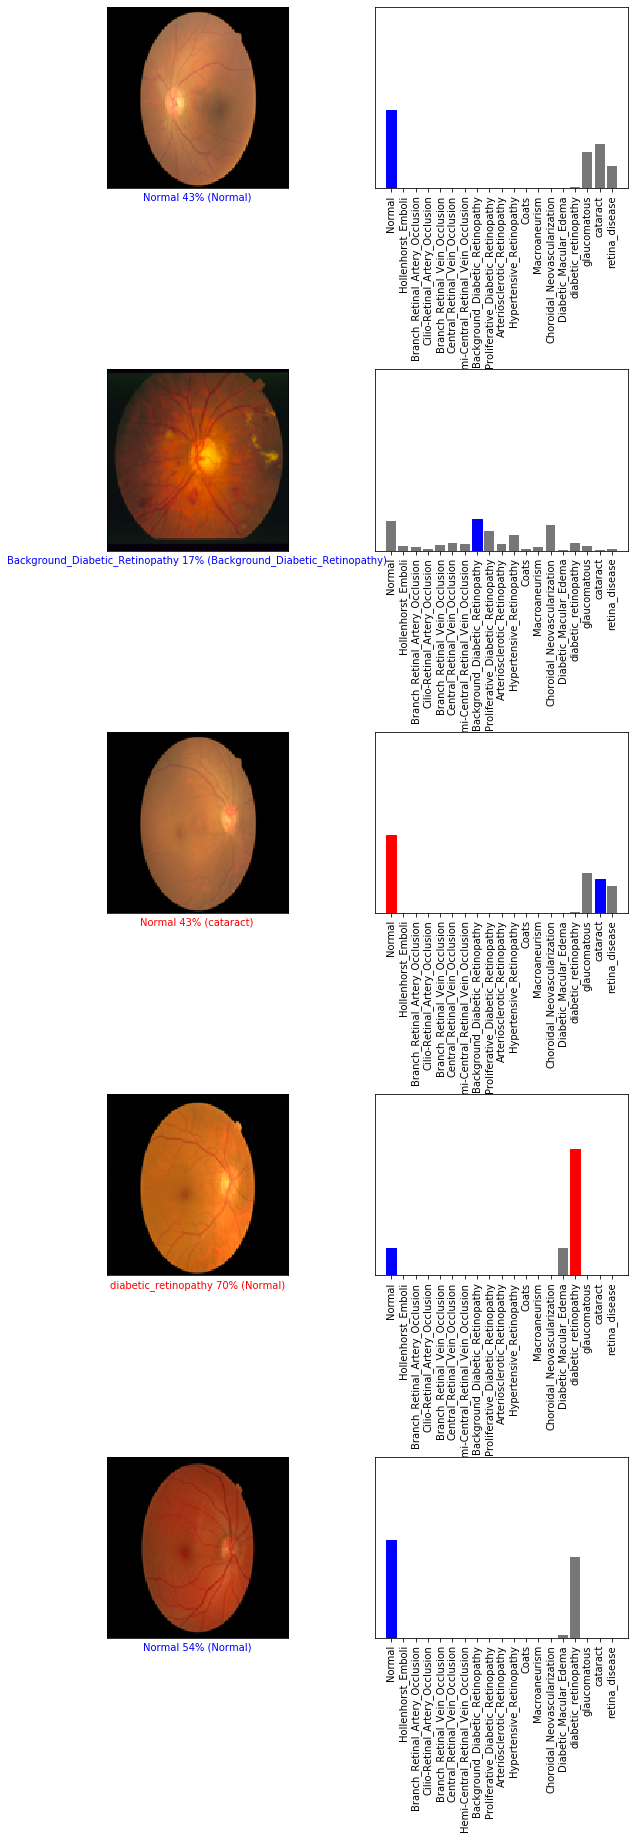

In [225]:
rnd_idx = np.random.randint(1, N_TEST//BATCH_SIZE)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt +=1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 1
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    
    plt.figure(figsize = (10,  30))
    plt.subplots_adjust(hspace=1.0)
    
    a = []
    
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i,predictions.numpy(), labels.numpy())
        df = abc(i,predictions.numpy())
        df = df[0].sort_values(ascending = False)
        a.append(df.head())
    break

In [228]:
for i in range(5):
    a[i] = a[i].rename(index=new_dic)

In [233]:
new_dic

{0: 'Normal',
 1: 'Hollenhorst_Emboli',
 2: 'Branch_Retinal_Artery_Occlusion',
 3: 'Cilio-Retinal_Artery_Occlusion',
 4: 'Branch_Retinal_Vein_Occlusion',
 5: 'Central_Retinal_Vein_Occlusion',
 6: 'Hemi-Central_Retinal_Vein_Occlusion',
 7: 'Background_Diabetic_Retinopathy',
 8: 'Proliferative_Diabetic_Retinopathy',
 9: 'Arteriosclerotic_Retinopathy',
 10: 'Hypertensive_Retinopathy',
 11: 'Coats',
 12: 'Macroaneurism',
 13: 'Choroidal_Neovascularization',
 15: 'diabetic_retinopathy',
 16: 'glaucomatous',
 17: 'cataract',
 18: 'retina_disease',
 14: 'Diabetic_Macular_Edema'}

In [229]:
a[0].index.tolist()

['Normal',
 'cataract',
 'glaucomatous',
 'retina_disease',
 'diabetic_retinopathy']

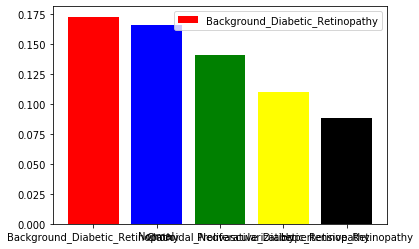

In [230]:
import matplotlib.pyplot as plt
plt.bar(a[1].index.tolist(),a[1],color = ['red','blue','green','yellow','black'])
plt.legend(a[1].index.tolist())

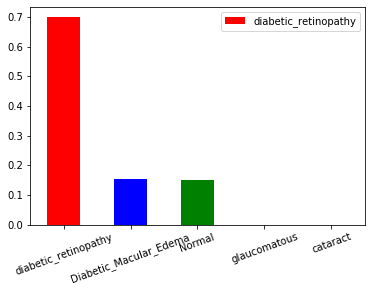

In [232]:
ax = a[3].plot(kind="bar", color = ['red','blue','green','yellow','black'], rot = 20)
ax.legend(labels=a[3].index.tolist())